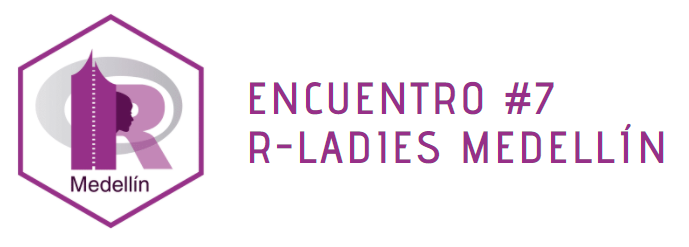

# Análisis y procesamiento de texto en R



En este taller procesaremos y analizaremos datos provenientes de Twitter relacionados con la vacunación contra el COVID-19 en Colombia.


## ¿Cómo extraer tweets de Twitter usando R?



El paquete `rtweet` proporciona a los usuarios de R una serie de funciones diseñadas para extraer datos de Twitter.

**Repositorio de GitHub:** https://github.com/ropensci/rtweet



### Obtener acceso al API de Twitter

El primer paso para extraer datos de Twitter es tener acceso a una API de Twitter:



1.   Si no tienes cuenta de Twitter, crea una.
2.   Aplica a una cuenta de desarrollador a través de esta página: https://developer.twitter.com/en/apply-for-access
3.   Llenar un formulario explicando qué deseas analizar y cual va a ser el tratamiento de los datos que vas a extraer.
4.   Guardar credenciales: 
      *   Consumer key
      *   Consumer Secret
      *   Access Token
      *   Access Secret








### Extraer tweets

In [ ]:
# instalar paquete
install.packages("rtweet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’, ‘httpuv’




In [ ]:
# Cargar paquete
library(rtweet)

# Credenciales de Twitter 
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
consumerKey <- 'XXXXXX'
consumerSecret <- 'XXXXXX'
accessToken <- 'XXXXXX'
accessTokenSecret <- 'XXXXXX'

# Nombre que le diste a la API 
appname <- "appname"

# Crear token para extraer datos
twitter_token <- create_token(app = appname,
                              consumer_key = consumerKey,
                              consumer_secret = consumerSecret,
                              access_token = accessToken,
                              access_secret = accessTokenSecret)
# Buscar tweets
datos_vacunacion <- search_tweets('vacunas OR vacunación OR vacuna AND "covid 19" AND colombia', n = 5000, include_rts = FALSE, lang = "es")

## Exploración de base de datos

In [ ]:
# Instalar paquetes
install.packages(c("readr", "dplyr", "tidytext", "tm", "Hmisc", "wordcloud", "stringr", "tidyr", "udpipe"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargar paquetes
library(dplyr)
library(stringr)
library(tidytext)
library(tm)
library(wordcloud)
library(Hmisc)
library(tidyr)
library(udpipe)
library(ggplot2)

In [ ]:
# Leer la base de datos
datos <- read.csv("/content/datos_vacunacion_taller.csv")
head(datos, 5)

,created_at,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>
1,22/09/2021 13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1
2,22/09/2021 13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2
3,15/09/2021 14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3
4,20/09/2021 23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4
5,14/09/2021 9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5


In [ ]:
# Dimensiones de la base de datos
print(dim(datos))

# Nombre de las columnas
print(colnames(datos))

[1] 566  10
 [1] "created_at"         "text"               "source"            
 [4] "display_text_width" "favorite_count"     "retweet_count"     
 [7] "quote_count"        "reply_count"        "hashtags"          
[10] "id_tweet"          


In [ ]:
# Explorar variables de la base de datos
glimpse(datos)

Rows: 566
Columns: 10
$ created_at         <chr> "22/09/2021 13:30", "22/09/2021 13:27", "15/09/2021…
$ text               <chr> "#LoViEnEnlace | El Invima aprobó modificar la auto…
$ source             <chr> "TweetDeck", "radiosantafe", "radiosantafe", "radio…
$ display_text_width <int> 257, 131, 121, 107, 107, 138, 116, 101, 136, 106, 1…
$ favorite_count     <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, …
$ retweet_count      <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, …
$ quote_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ reply_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ hashtags           <chr> "LoViEnEnlace", NA, NA, NA, NA, NA, NA, NA, NA, "Co…
$ id_tweet           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …


In [ ]:
# Separar fecha y hora
datos <- separate(datos, created_at, c("date", "time"), sep = " ", remove = FALSE)
head(datos, 5)

,created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>
1,22/09/2021 13:30,22/09/2021,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1
2,22/09/2021 13:27,22/09/2021,13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2
3,15/09/2021 14:46,15/09/2021,14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3
4,20/09/2021 23:30,20/09/2021,23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4
5,14/09/2021 9:39,14/09/2021,9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5


In [ ]:
# Columna fecha de tipo caracter a tipo date
datos$date <- as.Date(datos$date, format = "%d/%m/%Y")

In [ ]:
glimpse(datos)

Rows: 566
Columns: 12
$ created_at         <chr> "22/09/2021 13:30", "22/09/2021 13:27", "15/09/2021…
$ date               <date> 2021-09-22, 2021-09-22, 2021-09-15, 2021-09-20, 20…
$ time               <chr> "13:30", "13:27", "14:46", "23:30", "9:39", "13:49"…
$ text               <chr> "#LoViEnEnlace | El Invima aprobó modificar la auto…
$ source             <chr> "TweetDeck", "radiosantafe", "radiosantafe", "radio…
$ display_text_width <int> 257, 131, 121, 107, 107, 138, 116, 101, 136, 106, 1…
$ favorite_count     <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, …
$ retweet_count      <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, …
$ quote_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ reply_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ hashtags           <chr> "LoViEnEnlace", NA, NA, NA, NA, NA, NA, NA, NA, "Co…
$ id_tweet           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …


In [ ]:
print(min(datos$date))
print(max(datos$date))

[1] "2021-09-13"
[1] "2021-09-22"


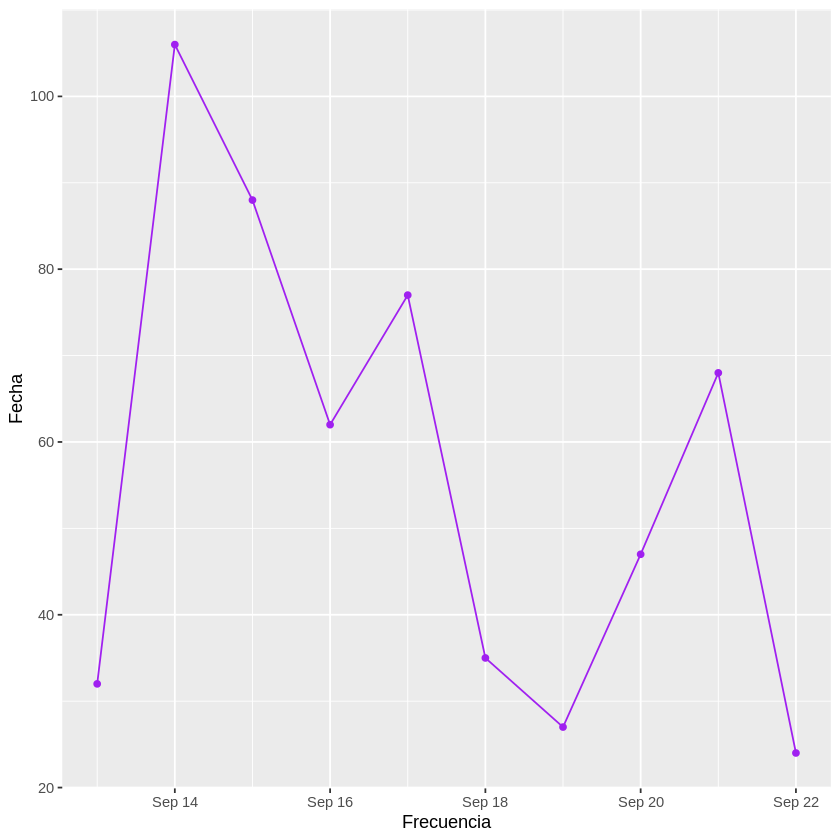

In [ ]:
# Cantidad de tweets por día
datos %>% group_by(date) %>% 
          summarise(Frecuencia = n()) %>%
          ggplot(aes(x = date, y = Frecuencia)) +
          geom_line(color = "purple") +
          geom_point(color = "purple") +
          labs(x = "Frecuencia", y = "Fecha")

In [ ]:
# Top source
unique(datos$source)
datos %>% count(source, sort = TRUE) %>%
          top_n(5)

[1] "TweetDeck"                      "radiosantafe"                  
 [3] "WordPress.com"                  "Twitter Web App"               
 [5] "Twitter for Android"            "Echobox"                       
 [7] "dlvr.it"                        "IFTTT"                         
 [9] "Twitter for iPhone"             "Hootsuite Inc."                
[11] "Blog2Social APP"                "Social Sharing Brightspot"     
[13] "Diario La Libertad"             "Spreaker"                      
[15] "Twitter Media Studio"           "ColombiacomTW"                 
[17] "Emplifi"                        "Buffer"                        
[19] "Twitter Ads"                    "Revive Social App"             
[21] "PanamericanaTV"                 "Twitter Media Studio - LiveCut"
[23] "ShareX"                         "LaFM"                          
[25] "RCN La Radio"                   "Agorapulse app"                
[27] "Metricool"                      "Actualidad Zuliana Oficial"    
[29] "araukas"                        "Alerta Bogotá"                 
[31] "Twitter for iPad"               "NextScripts OL"

Selecting by n



source,n
<chr>,<int>
Twitter Web App,187
Twitter for Android,109
TweetDeck,99
Twitter for iPhone,30
Hootsuite Inc.,28


In [ ]:
# Top retweets
datos %>% arrange(-retweet_count) %>%
          head(5) %>%
          select(id_tweet, created_at, text, retweet_count)

,id_tweet,created_at,text,retweet_count
,<int>,<chr>,<chr>,<int>
1,482,15/09/2021 2:48,"Primeros resultados del análisis de efectividad de vacunas COVID-19 en personas &gt; 60 años en Colombia por @MinSalud Un estudio robusto. En resumen, alta efectividad para prevención de desenlaces graves (hospitalización y muerte) con cualquier vacuna Detalles y comentarios 🧵 https://t.co/Em2gUC3XbD",346
2,279,20/09/2021 12:23,"Este lunes, Colombia recibió 689.220 dosis de vacunas de Moderna, que se destinarán inicialmente para segundas dosis. Así, el país completa 44’798.504 dosis en territorio, con las que seguimos avanzando en la inmunización de la población contra la COVID-19. https://t.co/ycE8Q0tGIT",235
3,280,15/09/2021 20:19,"Este miércoles, Colombia recibió 339.300 dosis de vacunas de Pfizer, destinadas para segundas dosis, que llegan para reforzar el Plan Nacional de Vacunación contra la COVID-19, ahora que todas las etapas de inmunización están abiertas. #Vacunémonos✌️ https://t.co/b2aPkEVCwP",100
4,228,21/09/2021 0:19,"Con la aprobación de la vacuna de Moderna para menores de edad por parte del Invima, así quedan los lineamientos para administración de dosis contra el covid-19 en Colombia. https://t.co/O3oWyfEtnd",51
5,334,18/09/2021 14:16,🌎 SUDAMERICA Población(%) que habré recibido al menos una dosis de vacuna contra COVID-19: 🇺🇾 Uruguay 77% 🇨🇱 Chile 76% 🇧🇷 Brazil 67% 🇦🇷 Argentina 63% 🇪🇨 Ecuador 59% 🇨🇴 Colombia 48% 🇵🇪 Peru 37% 🇵🇾 Paraguay 35% 🇧🇴 Bolivia 35% 🇻🇪 Venezuela 23% https://t.co/T8LIiGi7vF,42


In [ ]:
# Top favoritos
datos %>% arrange(-favorite_count) %>%
          head(5) %>%
          select(id_tweet, created_at, text, favorite_count)

,id_tweet,created_at,text,favorite_count
,<int>,<chr>,<chr>,<int>
1,279,20/09/2021 12:23,"Este lunes, Colombia recibió 689.220 dosis de vacunas de Moderna, que se destinarán inicialmente para segundas dosis. Así, el país completa 44’798.504 dosis en territorio, con las que seguimos avanzando en la inmunización de la población contra la COVID-19. https://t.co/ycE8Q0tGIT",1070
2,482,15/09/2021 2:48,"Primeros resultados del análisis de efectividad de vacunas COVID-19 en personas &gt; 60 años en Colombia por @MinSalud Un estudio robusto. En resumen, alta efectividad para prevención de desenlaces graves (hospitalización y muerte) con cualquier vacuna Detalles y comentarios 🧵 https://t.co/Em2gUC3XbD",835
3,280,15/09/2021 20:19,"Este miércoles, Colombia recibió 339.300 dosis de vacunas de Pfizer, destinadas para segundas dosis, que llegan para reforzar el Plan Nacional de Vacunación contra la COVID-19, ahora que todas las etapas de inmunización están abiertas. #Vacunémonos✌️ https://t.co/b2aPkEVCwP",483
4,304,19/09/2021 13:58,El 43% de personas en Colombia apoya que se pida carné de vacunación en las oficinas. Lea acá lo que mostró una encuesta al respecto → https://t.co/sdjpcKcyxu | #DomingoEnElTiempo https://t.co/Dw3DfW6NXo,426
5,228,21/09/2021 0:19,"Con la aprobación de la vacuna de Moderna para menores de edad por parte del Invima, así quedan los lineamientos para administración de dosis contra el covid-19 en Colombia. https://t.co/O3oWyfEtnd",134
